<a href="https://colab.research.google.com/github/Weeqa/dap-2024/blob/main/les07/rep_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 7

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.

PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
Survived – Выжил (0 – не выжил, 1 – выжил).
Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
Name – Имя (полное имя пассажира).
Sex – Пол (male – мужчина, female – женщина).
Age – Возраст (числовое значение, может быть дробным).
SibSp – Количество родственников на борту (братьев, сестер или супругов).
Parch – Количество родителей или детей на борту.
Ticket – Номер билета.
Fare – Стоимость билета (в фунтах стерлингов).
Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [3]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
from google.colab import files
uploaded = files.upload()

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic.csv


Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [4]:
titanic_df = pd.read_csv("titanic.csv", index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [5]:
titanic_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?

In [7]:
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [19]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
titanic_df_clean = titanic_df.drop(columns=columns_to_drop)
titanic_df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [21]:
titanic_df_clean['male'] = (titanic_df_clean['Sex'] == 'male').astype('int')
titanic_df_clean['female'] = (titanic_df_clean['Sex'] == 'female').astype('int')
titanic_df_clean = titanic_df_clean.drop(columns=['Sex'])
titanic_df_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0
2,1,1,38.0,1,0,71.2833,C,0,1
3,1,3,26.0,0,0,7.9250,S,0,1
4,1,1,35.0,1,0,53.1000,S,0,1
5,0,3,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,S,1,0
888,1,1,19.0,0,0,30.0000,S,0,1
889,0,3,NaN,1,2,23.4500,S,0,1


6. Удалите строки, которые содержать хотя бы одно null значение.

In [22]:
titanic_df_clean = titanic_df_clean.dropna()
titanic_df_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0
2,1,1,38.0,1,0,71.2833,C,0,1
3,1,3,26.0,0,0,7.9250,S,0,1
4,1,1,35.0,1,0,53.1000,S,0,1
5,0,3,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...
886,0,3,39.0,0,5,29.1250,Q,0,1
887,0,2,27.0,0,0,13.0000,S,1,0
888,1,1,19.0,0,0,30.0000,S,0,1


Исследование данных

7. Нормализуйте значения признака "Fare".

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Среднее значение и отклонение признака
titanic_df_clean = titanic_df_clean.copy()

titanic_df_clean.loc[:, 'Fare_standart'] = scaler.fit_transform(titanic_df_clean[['Fare']])
titanic_df_clean = titanic_df_clean.drop(columns=['Fare_standart'])
average_fare = titanic_df_clean['Fare'].mean()
print(average_fare)
titanic_df_clean

34.567251404494385


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female,Fare_standardized
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0,-0.516380
2,1,1,38.0,1,0,71.2833,C,0,1,0.694046
3,1,3,26.0,0,0,7.9250,S,0,1,-0.503620
4,1,1,35.0,1,0,53.1000,S,0,1,0.350326
5,0,3,35.0,0,0,8.0500,S,1,0,-0.501257
...,...,...,...,...,...,...,...,...,...,...
886,0,3,39.0,0,5,29.1250,Q,0,1,-0.102875
887,0,2,27.0,0,0,13.0000,S,1,0,-0.407687
888,1,1,19.0,0,0,30.0000,S,0,1,-0.086335


8. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [33]:
titanic_df_clean.pivot_table('Fare', columns='Survived', aggfunc='mean')

Survived,0,1
Fare,22.965456,51.647672


9. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

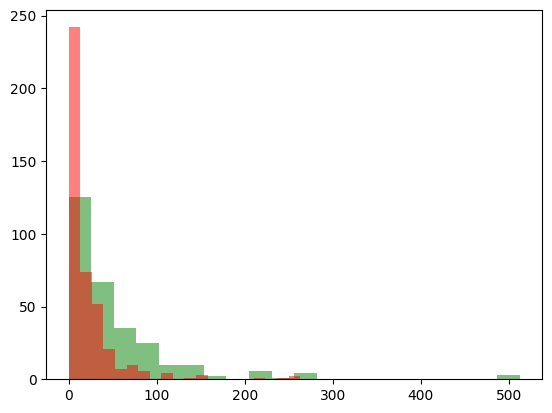

In [36]:
plt.hist(titanic_df_clean[titanic_df_clean['Survived'] == 1]['Fare'], bins=20, alpha = 0.5, label='Выжившие', color='green')
plt.hist(titanic_df_clean[titanic_df_clean['Survived'] == 0]['Fare'], bins=20, alpha = 0.5, label='Погибшие', color='red')
plt.show()

10. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [51]:
X = titanic_df_clean[['Pclass','SibSp','Parch','female','male','Fare','Age']]
y = titanic_df_clean['Survived']
print(X)

             Pclass  SibSp  Parch  female  male     Fare   Age
PassengerId                                                   
1                 3      1      0       0     1   7.2500  22.0
2                 1      1      0       1     0  71.2833  38.0
3                 3      0      0       1     0   7.9250  26.0
4                 1      1      0       1     0  53.1000  35.0
5                 3      0      0       0     1   8.0500  35.0
...             ...    ...    ...     ...   ...      ...   ...
886               3      0      5       1     0  29.1250  39.0
887               2      0      0       0     1  13.0000  27.0
888               1      0      0       1     0  30.0000  19.0
890               1      0      0       0     1  30.0000  26.0
891               3      0      0       0     1   7.7500  32.0

[712 rows x 7 columns]


Предсказательная модель

11. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, train_size=0.25, random_state=42)

12. Выполните обучение модели.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Проверка модели

13. Выведите мартицу ошибок

In [54]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,266,57
1,124,87


In [56]:
model_matrix_df = pd.DataFrame(model_matrix, columns=['П умер','П выжил'], index=['Ф умер','Ф выжил'])
model_matrix_df

,П умер,П выжил
Ф умер,266,57
Ф выжил,124,87


Верно предсказала то, что 266 умерло и 87 выжило.
Ошибочно предсказала, что 57 выжило и 124 умерло

14. Расчитайте accuracy

In [55]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.66